# 1. Same Parameters

## Imports and Setup

In [519]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Load Mean and Standard Deviation Values

In [520]:
# Load mean and std values from JSON
with open('mean_std.json', 'r') as f:
    mean_std = json.load(f)
mean = np.array(mean_std['mean'])
std = np.array(mean_std['std'])

## Model Definition

In [521]:
def get_mobilenetv2_model(num_classes):
    base_model = MobileNetV2(weights=None, include_top=False, input_shape=(224, 224, 3))

    # Freeze all the weights
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

## Data Generators

In [522]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True
)
train_datagen.mean = mean
train_datagen.std = std

val_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
val_datagen.mean = mean
val_datagen.std = std

## Training and Evaluation Function

In [523]:
def train_model(model, train_generator, val_generator, num_epochs=10, patience=3):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=patience, restore_best_weights=True)

    history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=val_generator,
        callbacks=[early_stopping]
    )

    return model, history

def evaluate_model(model, generator):
    results = model.evaluate(generator)
    return results

## Main Training and Evaluation Loop

Starting training for fold 0...
Found 384 images belonging to 4 classes.


Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 132ms/step - loss: 1.3864 - accuracy: 0.2266 - val_loss: 1.3868 - val_accuracy: 0.1875
Epoch 2/10
24/24 [==============================] - 3s 109ms/step - loss: 1.3863 - accuracy: 0.2656 - val_loss: 1.3875 - val_accuracy: 0.1875
Epoch 3/10
24/24 [==============================] - 3s 126ms/step - loss: 1.3862 - accuracy: 0.2656 - val_loss: 1.3879 - val_accuracy: 0.1875
Epoch 4/10
24/24 [==============================] - 3s 109ms/step - loss: 1.3860 - accuracy: 0.2656 - val_loss: 1.3878 - val_accuracy: 0.1875
Evaluating model for fold 0...
6/6 [==============================] - 1s 86ms/step - loss: 1.3868 - accuracy: 0.1875
Val loss: 1.3868, Val accuracy: 18.7500
Training and evaluation for fold 0 completed.

Starting training for fold 1...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 130ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3867 - val_accuracy: 0.1562
Epoch 2/10
24/24 [==============================] - 3s 112ms/step - loss: 1.3862 - accuracy: 0.2734 - val_loss: 1.3874 - val_accuracy: 0.1562
Epoch 3/10
24/24 [==============================] - 3s 109ms/step - loss: 1.3860 - accuracy: 0.2734 - val_loss: 1.3884 - val_accuracy: 0.1562
Epoch 4/10
24/24 [==============================] - 3s 111ms/step - loss: 1.3858 - accuracy: 0.2734 - val_loss: 1.3891 - val_accuracy: 0.1562
Evaluating model for fold 1...
6/6 [==============================] - 1s 84ms/step - loss: 1.3867 - accuracy: 0.1562
Val loss: 1.3867, Val accuracy: 15.6250
Training and evaluation for fold 1 completed.

Starting training for fold 2...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 134ms/step - loss: 1.3865 - accuracy: 0.2214 - val_loss: 1.3870 - val_accuracy: 0.1667
Epoch 2/10
24/24 [==============================] - 3s 112ms/step - loss: 1.3862 - accuracy: 0.2708 - val_loss: 1.3874 - val_accuracy: 0.1667
Epoch 3/10
24/24 [==============================] - 3s 112ms/step - loss: 1.3862 - accuracy: 0.2708 - val_loss: 1.3880 - val_accuracy: 0.1667
Epoch 4/10
24/24 [==============================] - 3s 117ms/step - loss: 1.3859 - accuracy: 0.2708 - val_loss: 1.3885 - val_accuracy: 0.1667
Evaluating model for fold 2...
6/6 [==============================] - 1s 85ms/step - loss: 1.3870 - accuracy: 0.1667
Val loss: 1.3870, Val accuracy: 16.6667
Training and evaluation for fold 2 completed.

Starting training for fold 3...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 143ms/step - loss: 1.3865 - accuracy: 0.2214 - val_loss: 1.3862 - val_accuracy: 0.2292
Epoch 2/10
24/24 [==============================] - 3s 111ms/step - loss: 1.3865 - accuracy: 0.2552 - val_loss: 1.3866 - val_accuracy: 0.2292
Epoch 3/10
24/24 [==============================] - 3s 116ms/step - loss: 1.3864 - accuracy: 0.2552 - val_loss: 1.3866 - val_accuracy: 0.2292
Epoch 4/10
24/24 [==============================] - 4s 150ms/step - loss: 1.3863 - accuracy: 0.2552 - val_loss: 1.3866 - val_accuracy: 0.2292
Evaluating model for fold 3...
6/6 [==============================] - 1s 90ms/step - loss: 1.3862 - accuracy: 0.2292
Val loss: 1.3862, Val accuracy: 22.9167
Training and evaluation for fold 3 completed.

Starting training for fold 4...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 4s 131ms/step - loss: 1.3863 - accuracy: 0.2422 - val_loss: 1.3867 - val_accuracy: 0.2292
Epoch 2/10
24/24 [==============================] - 4s 161ms/step - loss: 1.3862 - accuracy: 0.2422 - val_loss: 1.3870 - val_accuracy: 0.2292
Epoch 3/10
24/24 [==============================] - 3s 119ms/step - loss: 1.3862 - accuracy: 0.2188 - val_loss: 1.3873 - val_accuracy: 0.2292
Epoch 4/10
24/24 [==============================] - 3s 116ms/step - loss: 1.3862 - accuracy: 0.2500 - val_loss: 1.3874 - val_accuracy: 0.2188
Evaluating model for fold 4...
6/6 [==============================] - 1s 85ms/step - loss: 1.3867 - accuracy: 0.2292
Val loss: 1.3867, Val accuracy: 22.9167
Training and evaluation for fold 4 completed.

Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 107ms/step
Fold 0 - ROC-AUC for class glioma: 0.5000
Fold 0 - ROC-AUC for class meningioma: 0.5000
Fold 0 - ROC-AUC for class notumor: 0.5000
Fold

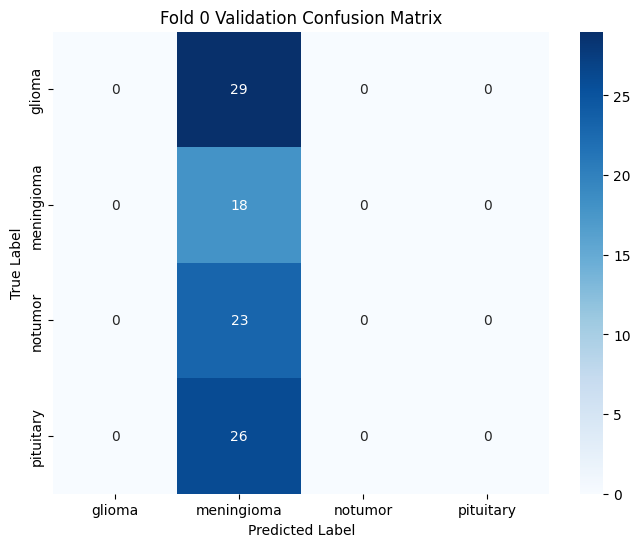

Classification Report for Fold 0:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        29
  meningioma       0.19      1.00      0.32        18
     notumor       0.00      0.00      0.00        23
   pituitary       0.00      0.00      0.00        26

    accuracy                           0.19        96
   macro avg       0.05      0.25      0.08        96
weighted avg       0.04      0.19      0.06        96

Class-wise TP, TN, FP, FN for Fold 0:
Class: glioma, TP: 0, TN: 67, FP: 0, FN: 29
Class: meningioma, TP: 18, TN: 0, FP: 78, FN: 0
Class: notumor, TP: 0, TN: 73, FP: 0, FN: 23
Class: pituitary, TP: 0, TN: 70, FP: 0, FN: 26
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 1s 87ms/step
Fold 1 - ROC-AUC for class glioma: 0.5000
Fold 1 - ROC-AUC for class meningioma: 0.5000
Fold 1 - ROC-AUC for class notumor: 0.5000
Fold 1 - ROC-AUC for class pituitary: 0.5000


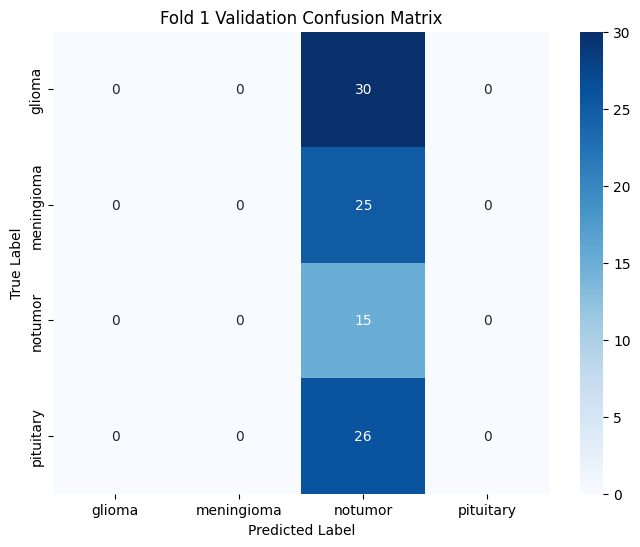

Classification Report for Fold 1:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        30
  meningioma       0.00      0.00      0.00        25
     notumor       0.16      1.00      0.27        15
   pituitary       0.00      0.00      0.00        26

    accuracy                           0.16        96
   macro avg       0.04      0.25      0.07        96
weighted avg       0.02      0.16      0.04        96

Class-wise TP, TN, FP, FN for Fold 1:
Class: glioma, TP: 0, TN: 66, FP: 0, FN: 30
Class: meningioma, TP: 0, TN: 71, FP: 0, FN: 25
Class: notumor, TP: 15, TN: 0, FP: 81, FN: 0
Class: pituitary, TP: 0, TN: 70, FP: 0, FN: 26
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 1s 92ms/step
Fold 2 - ROC-AUC for class glioma: 0.5000
Fold 2 - ROC-AUC for class meningioma: 0.5000
Fold 2 - ROC-AUC for class notumor: 0.5000
Fold 2 - ROC-AUC for class pituitary: 0.5000


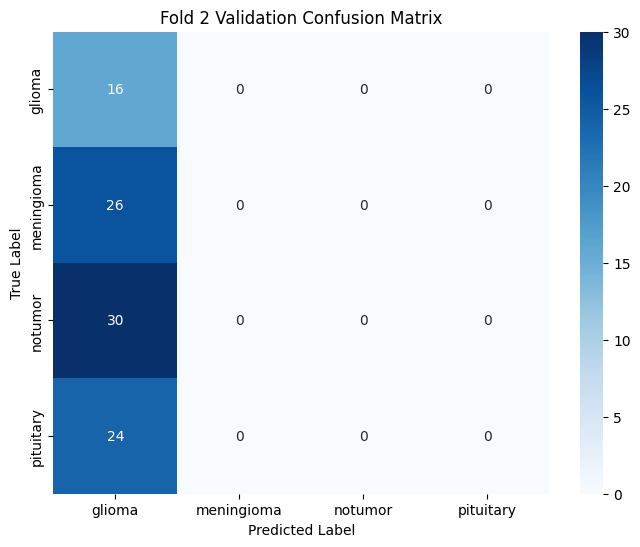

Classification Report for Fold 2:
              precision    recall  f1-score   support

      glioma       0.17      1.00      0.29        16
  meningioma       0.00      0.00      0.00        26
     notumor       0.00      0.00      0.00        30
   pituitary       0.00      0.00      0.00        24

    accuracy                           0.17        96
   macro avg       0.04      0.25      0.07        96
weighted avg       0.03      0.17      0.05        96

Class-wise TP, TN, FP, FN for Fold 2:
Class: glioma, TP: 16, TN: 0, FP: 80, FN: 0
Class: meningioma, TP: 0, TN: 70, FP: 0, FN: 26
Class: notumor, TP: 0, TN: 66, FP: 0, FN: 30
Class: pituitary, TP: 0, TN: 72, FP: 0, FN: 24
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 1s 88ms/step
Fold 3 - ROC-AUC for class glioma: 0.5000
Fold 3 - ROC-AUC for class meningioma: 0.5000
Fold 3 - ROC-AUC for class notumor: 0.5000
Fold 3 - ROC-AUC for class pituitary: 0.5000


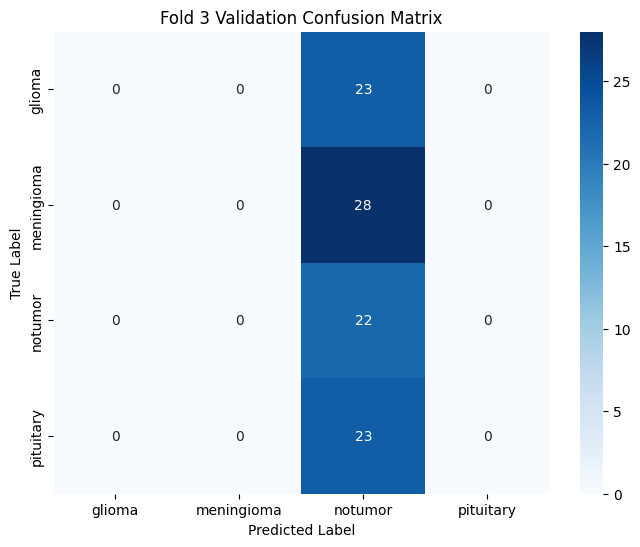

Classification Report for Fold 3:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        23
  meningioma       0.00      0.00      0.00        28
     notumor       0.23      1.00      0.37        22
   pituitary       0.00      0.00      0.00        23

    accuracy                           0.23        96
   macro avg       0.06      0.25      0.09        96
weighted avg       0.05      0.23      0.09        96

Class-wise TP, TN, FP, FN for Fold 3:
Class: glioma, TP: 0, TN: 73, FP: 0, FN: 23
Class: meningioma, TP: 0, TN: 68, FP: 0, FN: 28
Class: notumor, TP: 22, TN: 0, FP: 74, FN: 0
Class: pituitary, TP: 0, TN: 73, FP: 0, FN: 23
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 2s 232ms/step
Fold 4 - ROC-AUC for class glioma: 0.5000
Fold 4 - ROC-AUC for class meningioma: 0.5000
Fold 4 - ROC-AUC for class notumor: 0.5000
Fold 4 - ROC-AUC for class pituitary: 0.5000


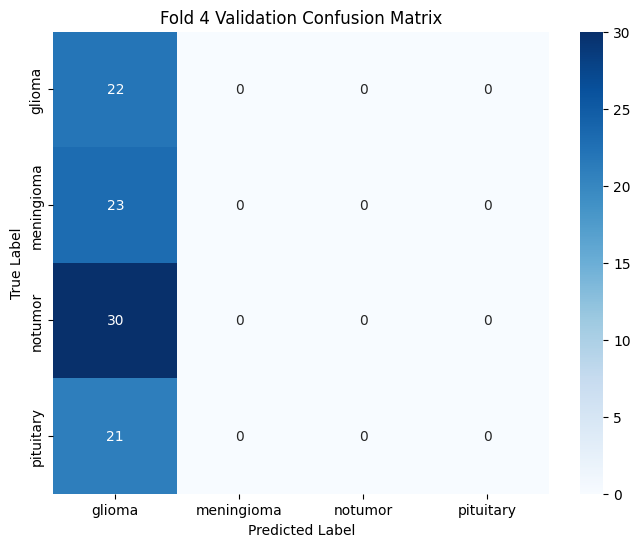

Classification Report for Fold 4:
              precision    recall  f1-score   support

      glioma       0.23      1.00      0.37        22
  meningioma       0.00      0.00      0.00        23
     notumor       0.00      0.00      0.00        30
   pituitary       0.00      0.00      0.00        21

    accuracy                           0.23        96
   macro avg       0.06      0.25      0.09        96
weighted avg       0.05      0.23      0.09        96

Class-wise TP, TN, FP, FN for Fold 4:
Class: glioma, TP: 22, TN: 0, FP: 74, FN: 0
Class: meningioma, TP: 0, TN: 73, FP: 0, FN: 23
Class: notumor, TP: 0, TN: 66, FP: 0, FN: 30
Class: pituitary, TP: 0, TN: 75, FP: 0, FN: 21


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

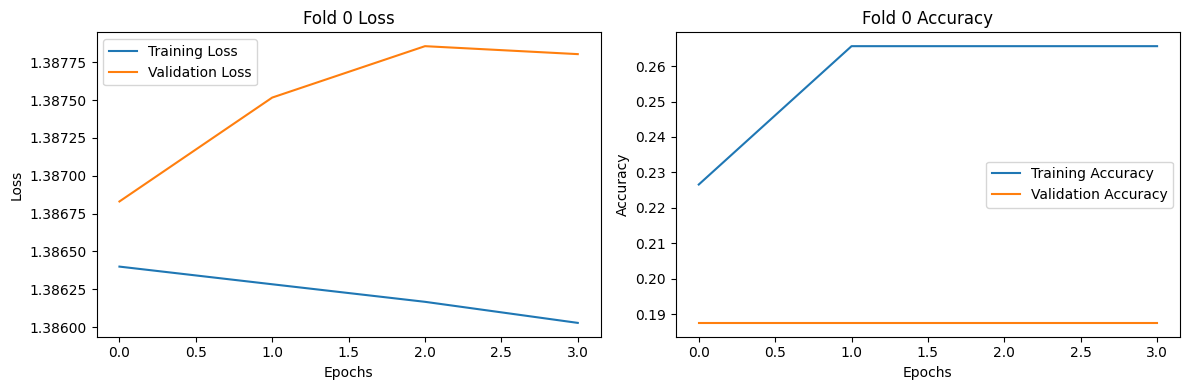

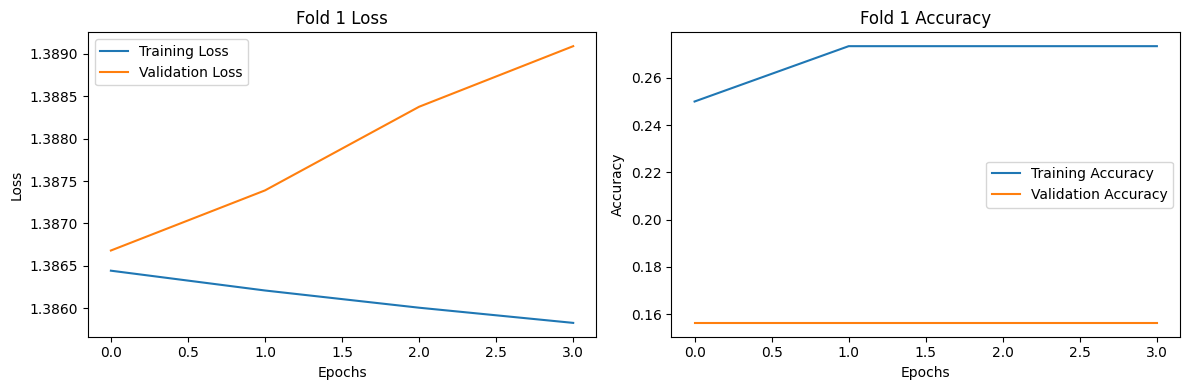

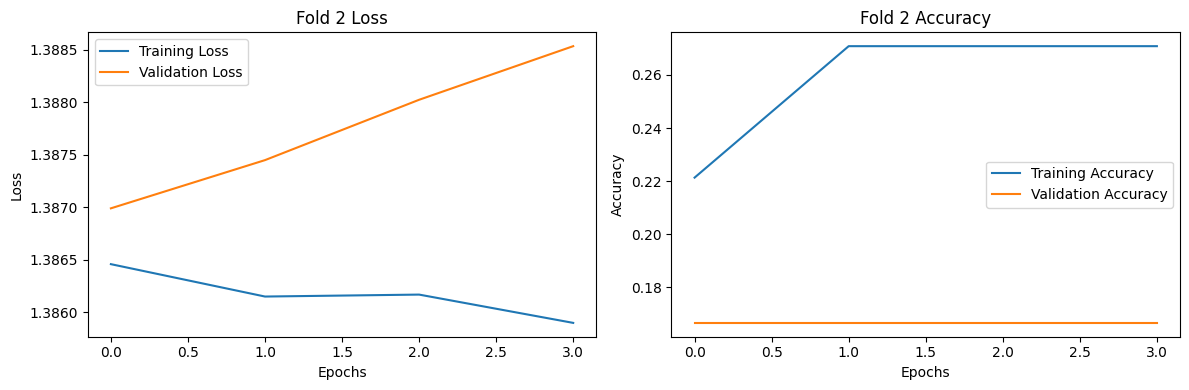

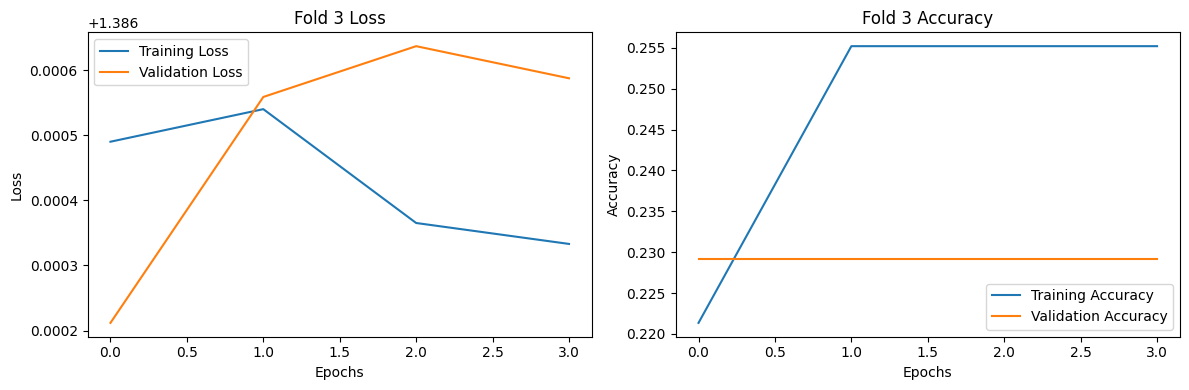

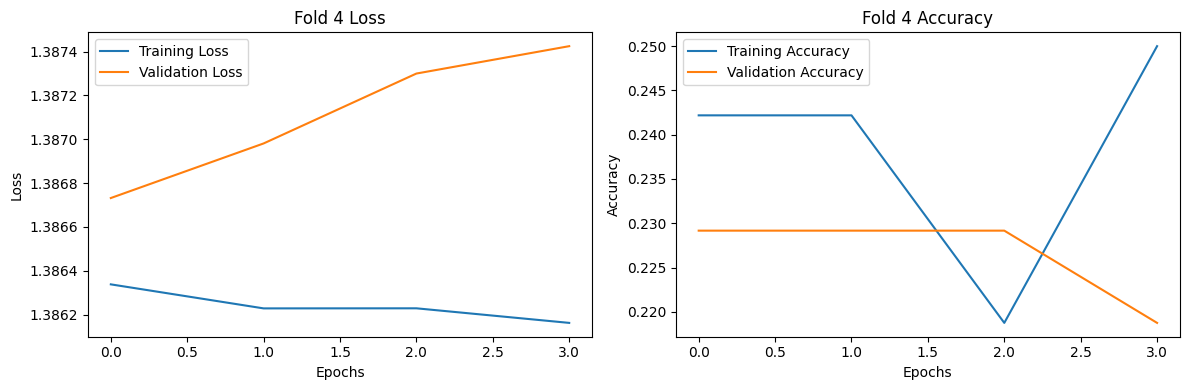

Accuracies for each fold:
Fold 0: 18.75%
Fold 1: 15.62%
Fold 2: 16.67%
Fold 3: 22.92%
Fold 4: 22.92%


In [524]:
base_dir = 'dataset_kfold'

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
fold_accuracies = []
models = []

for fold in range(5):
    print(f'Starting training for fold {fold}...')

    fold_dir = os.path.join(base_dir, f'fold_{fold}')
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')

    # Load the datasets
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    # Get the model and compile it
    num_classes = len(train_generator.class_indices)
    model = get_mobilenetv2_model(num_classes)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and evaluate the model
    model, history = train_model(model, train_generator, val_generator, num_epochs=10, patience=3)
    models.append(model)  # Save the model in the list for further evaluation

    # Collecting results for plotting
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

    print(f'Evaluating model for fold {fold}...')
    val_loss, val_acc = evaluate_model(model, val_generator)
    fold_accuracies.append(val_acc)
    print(f'Val loss: {val_loss:.4f}, Val accuracy: {val_acc * 100:.4f}')
    print(f'Training and evaluation for fold {fold} completed.\n')

# Detailed Evaluation for Each Fold
for fold in range(5):
    model = models[fold]  # Load the model from the list

    val_dir = os.path.join(base_dir, f'fold_{fold}', 'val')
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False
    )

    val_predictions = model.predict(val_generator)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = val_generator.classes

    val_conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)

    val_true_classes_one_hot = tf.keras.utils.to_categorical(val_true_classes, num_classes)
    auc_roc_scores = {}
    for i, class_name in enumerate(val_generator.class_indices.keys()):
        fpr, tpr, _ = roc_curve(val_true_classes_one_hot[:, i], val_predictions[:, i])
        roc_auc = auc(fpr, tpr)
        auc_roc_scores[class_name] = roc_auc
        print(f'Fold {fold} - ROC-AUC for class {class_name}: {roc_auc:.4f}')

    plt.figure(figsize=(8, 6))
    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Fold {fold} Validation Confusion Matrix')
    plt.show()

    print(f'Classification Report for Fold {fold}:')
    print(classification_report(val_true_classes, val_predictions_classes, target_names=list(val_generator.class_indices.keys())))

    class_names = list(val_generator.class_indices.keys())
    table_data = []
    for i, class_name in enumerate(class_names):
        tp = val_conf_matrix[i, i]
        fp = np.sum(val_conf_matrix[:, i]) - tp
        fn = np.sum(val_conf_matrix[i, :]) - tp
        tn = np.sum(val_conf_matrix) - tp - fp - fn
        table_data.append([class_name, tp, tn, fp, fn])

    print(f"Class-wise TP, TN, FP, FN for Fold {fold}:")
    for row in table_data:
        print(f"Class: {row[0]}, TP: {row[1]}, TN: {row[2]}, FP: {row[3]}, FN: {row[4]}")

# Plotting Results
def plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies):
    for fold in range(5):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(all_train_losses[fold], label='Training Loss')
        plt.plot(all_val_losses[fold], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Fold {fold} Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(all_train_accuracies[fold], label='Training Accuracy')
        plt.plot(all_val_accuracies[fold], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Fold {fold} Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)

print("Accuracies for each fold:")
for fold, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold}: {accuracy * 100:.2f}%")

# 2. Own Parameters

## Imports and Setup

In [513]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Load Mean and Standard Deviation Values

In [514]:
# Load mean and std values from JSON
with open('mean_std.json', 'r') as f:
    mean_std = json.load(f)
mean = np.array(mean_std['mean'])
std = np.array(mean_std['std'])

## Model Definition

In [515]:
def get_mobilenetv2_model(num_classes):
    base_model = MobileNetV2(weights=None, include_top=False, input_shape=(224, 224, 3))

    # Unfreeze the last few layers for fine-tuning
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

## Data Generators

In [516]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)
train_datagen.mean = mean
train_datagen.std = std

val_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
val_datagen.mean = mean
val_datagen.std = std

## Training and Evaluation Functions

In [517]:
def train_model(model, train_generator, val_generator, num_epochs=10, patience=3):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr]
    )
    return model, history

def evaluate_model(model, generator):
    results = model.evaluate(generator)
    return results

## Main Training and Evaluation Loop

Starting training for fold 0...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 6s 161ms/step - loss: 1.3880 - accuracy: 0.2188 - val_loss: 1.3861 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 136ms/step - loss: 1.3884 - accuracy: 0.2370 - val_loss: 1.3872 - val_accuracy: 0.1875 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 4s 149ms/step - loss: 1.3856 - accuracy: 0.2578 - val_loss: 1.3876 - val_accuracy: 0.1875 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 137ms/step - loss: 1.3872 - accuracy: 0.2188 - val_loss: 1.3882 - val_accuracy: 0.1875 - lr: 1.0000e-04
Evaluating model for fold 0...
6/6 [==============================] - 1s 83ms/step - loss: 1.3861 - accuracy: 0.2396
Val loss: 1.3861, Val accuracy: 23.9583
Training and evaluation for fold 0 completed.

Starting training for fold 1...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 162ms/step - loss: 1.3878 - accuracy: 0.2083 - val_loss: 1.3869 - val_accuracy: 0.1562 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 139ms/step - loss: 1.3877 - accuracy: 0.2422 - val_loss: 1.3881 - val_accuracy: 0.1562 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 135ms/step - loss: 1.3856 - accuracy: 0.2448 - val_loss: 1.3896 - val_accuracy: 0.1562 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 138ms/step - loss: 1.3859 - accuracy: 0.2708 - val_loss: 1.3904 - val_accuracy: 0.1562 - lr: 1.0000e-04
Evaluating model for fold 1...
6/6 [==============================] - 1s 82ms/step - loss: 1.3869 - accuracy: 0.1562
Val loss: 1.3869, Val accuracy: 15.6250
Training and evaluation for fold 1 completed.

Starting training for fold 2...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 155ms/step - loss: 1.3870 - accuracy: 0.2422 - val_loss: 1.3869 - val_accuracy: 0.1667 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 137ms/step - loss: 1.3866 - accuracy: 0.2578 - val_loss: 1.3874 - val_accuracy: 0.1667 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 143ms/step - loss: 1.3885 - accuracy: 0.2370 - val_loss: 1.3882 - val_accuracy: 0.1667 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 140ms/step - loss: 1.3837 - accuracy: 0.2943 - val_loss: 1.3892 - val_accuracy: 0.1667 - lr: 1.0000e-04
Evaluating model for fold 2...
6/6 [==============================] - 1s 85ms/step - loss: 1.3869 - accuracy: 0.1667
Val loss: 1.3869, Val accuracy: 16.6667
Training and evaluation for fold 2 completed.

Starting training for fold 3...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 7s 158ms/step - loss: 1.3859 - accuracy: 0.2734 - val_loss: 1.3862 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 136ms/step - loss: 1.3867 - accuracy: 0.2422 - val_loss: 1.3865 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 138ms/step - loss: 1.3844 - accuracy: 0.2734 - val_loss: 1.3867 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 140ms/step - loss: 1.3878 - accuracy: 0.2526 - val_loss: 1.3868 - val_accuracy: 0.2396 - lr: 1.0000e-04
Evaluating model for fold 3...
6/6 [==============================] - 1s 85ms/step - loss: 1.3862 - accuracy: 0.2396
Val loss: 1.3862, Val accuracy: 23.9583
Training and evaluation for fold 3 completed.

Starting training for fold 4...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 6s 163ms/step - loss: 1.3870 - accuracy: 0.2370 - val_loss: 1.3867 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 139ms/step - loss: 1.3869 - accuracy: 0.2578 - val_loss: 1.3869 - val_accuracy: 0.2292 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 142ms/step - loss: 1.3864 - accuracy: 0.2240 - val_loss: 1.3872 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 142ms/step - loss: 1.3899 - accuracy: 0.2083 - val_loss: 1.3874 - val_accuracy: 0.2292 - lr: 1.0000e-04
Evaluating model for fold 4...
6/6 [==============================] - 1s 86ms/step - loss: 1.3867 - accuracy: 0.2396
Val loss: 1.3867, Val accuracy: 23.9583
Training and evaluation for fold 4 completed.

Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 86ms/step
Fold 0 - ROC-AUC for class glioma: 0.5000
Fold 0 - ROC-AUC for class

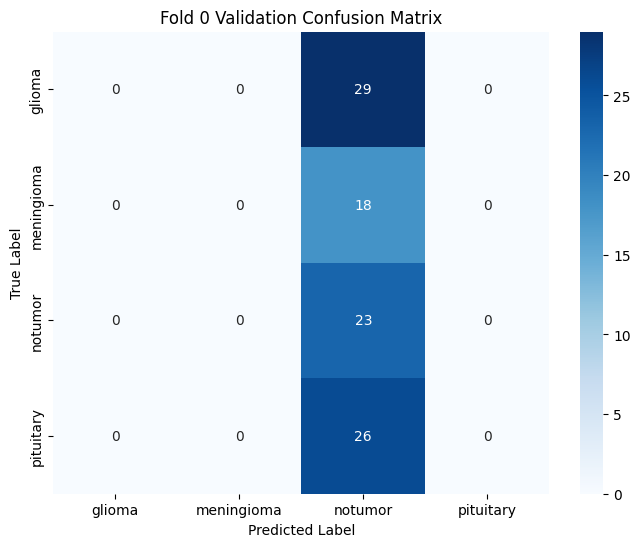

Classification Report for Fold 0:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        29
  meningioma       0.00      0.00      0.00        18
     notumor       0.24      1.00      0.39        23
   pituitary       0.00      0.00      0.00        26

    accuracy                           0.24        96
   macro avg       0.06      0.25      0.10        96
weighted avg       0.06      0.24      0.09        96

Class-wise TP, TN, FP, FN for Fold 0:
Class: glioma, TP: 0, TN: 67, FP: 0, FN: 29
Class: meningioma, TP: 0, TN: 78, FP: 0, FN: 18
Class: notumor, TP: 23, TN: 0, FP: 73, FN: 0
Class: pituitary, TP: 0, TN: 70, FP: 0, FN: 26
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 1s 90ms/step
Fold 1 - ROC-AUC for class glioma: 0.5000
Fold 1 - ROC-AUC for class meningioma: 0.5000
Fold 1 - ROC-AUC for class notumor: 0.5000
Fold 1 - ROC-AUC for class pituitary: 0.5000


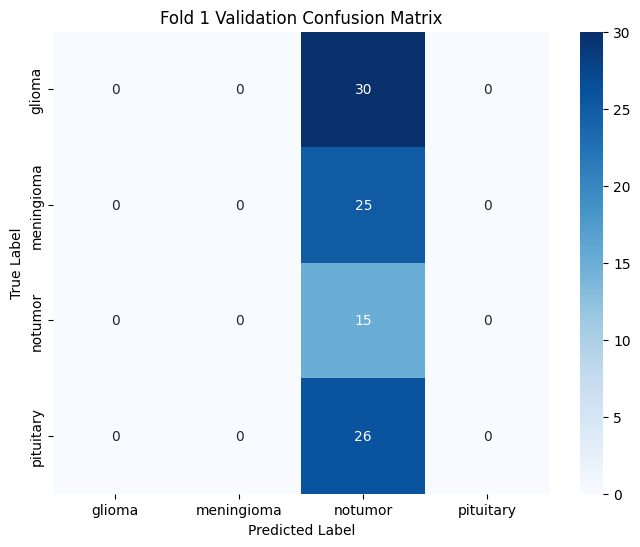

Classification Report for Fold 1:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        30
  meningioma       0.00      0.00      0.00        25
     notumor       0.16      1.00      0.27        15
   pituitary       0.00      0.00      0.00        26

    accuracy                           0.16        96
   macro avg       0.04      0.25      0.07        96
weighted avg       0.02      0.16      0.04        96

Class-wise TP, TN, FP, FN for Fold 1:
Class: glioma, TP: 0, TN: 66, FP: 0, FN: 30
Class: meningioma, TP: 0, TN: 71, FP: 0, FN: 25
Class: notumor, TP: 15, TN: 0, FP: 81, FN: 0
Class: pituitary, TP: 0, TN: 70, FP: 0, FN: 26
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 1s 97ms/step
Fold 2 - ROC-AUC for class glioma: 0.5000
Fold 2 - ROC-AUC for class meningioma: 0.5000
Fold 2 - ROC-AUC for class notumor: 0.5000
Fold 2 - ROC-AUC for class pituitary: 0.5000


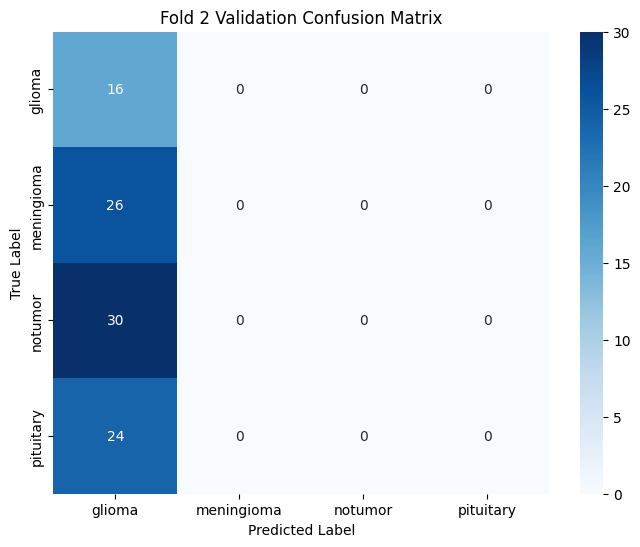

Classification Report for Fold 2:
              precision    recall  f1-score   support

      glioma       0.17      1.00      0.29        16
  meningioma       0.00      0.00      0.00        26
     notumor       0.00      0.00      0.00        30
   pituitary       0.00      0.00      0.00        24

    accuracy                           0.17        96
   macro avg       0.04      0.25      0.07        96
weighted avg       0.03      0.17      0.05        96

Class-wise TP, TN, FP, FN for Fold 2:
Class: glioma, TP: 16, TN: 0, FP: 80, FN: 0
Class: meningioma, TP: 0, TN: 70, FP: 0, FN: 26
Class: notumor, TP: 0, TN: 66, FP: 0, FN: 30
Class: pituitary, TP: 0, TN: 72, FP: 0, FN: 24
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 1s 92ms/step
Fold 3 - ROC-AUC for class glioma: 0.5000
Fold 3 - ROC-AUC for class meningioma: 0.5000
Fold 3 - ROC-AUC for class notumor: 0.5000
Fold 3 - ROC-AUC for class pituitary: 0.5000


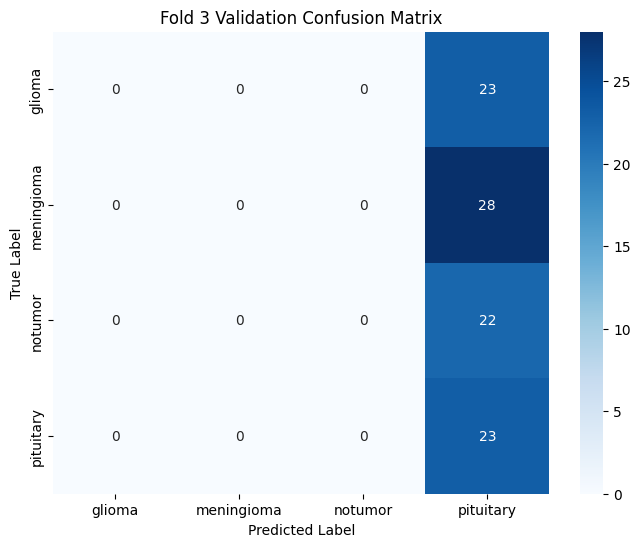

Classification Report for Fold 3:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        23
  meningioma       0.00      0.00      0.00        28
     notumor       0.00      0.00      0.00        22
   pituitary       0.24      1.00      0.39        23

    accuracy                           0.24        96
   macro avg       0.06      0.25      0.10        96
weighted avg       0.06      0.24      0.09        96

Class-wise TP, TN, FP, FN for Fold 3:
Class: glioma, TP: 0, TN: 73, FP: 0, FN: 23
Class: meningioma, TP: 0, TN: 68, FP: 0, FN: 28
Class: notumor, TP: 0, TN: 74, FP: 0, FN: 22
Class: pituitary, TP: 23, TN: 0, FP: 73, FN: 0
Found 96 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

6/6 [==============================] - 1s 91ms/step
Fold 4 - ROC-AUC for class glioma: 0.5000
Fold 4 - ROC-AUC for class meningioma: 0.5000
Fold 4 - ROC-AUC for class notumor: 0.5000
Fold 4 - ROC-AUC for class pituitary: 0.5000


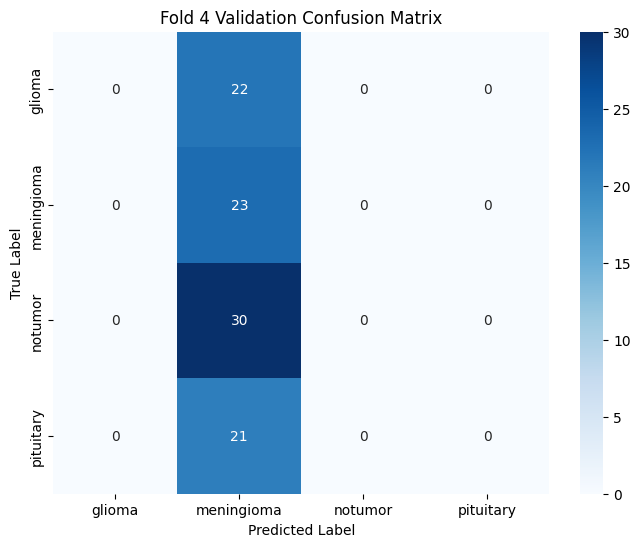

Classification Report for Fold 4:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        22
  meningioma       0.24      1.00      0.39        23
     notumor       0.00      0.00      0.00        30
   pituitary       0.00      0.00      0.00        21

    accuracy                           0.24        96
   macro avg       0.06      0.25      0.10        96
weighted avg       0.06      0.24      0.09        96

Class-wise TP, TN, FP, FN for Fold 4:
Class: glioma, TP: 0, TN: 74, FP: 0, FN: 22
Class: meningioma, TP: 23, TN: 0, FP: 73, FN: 0
Class: notumor, TP: 0, TN: 66, FP: 0, FN: 30
Class: pituitary, TP: 0, TN: 75, FP: 0, FN: 21


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

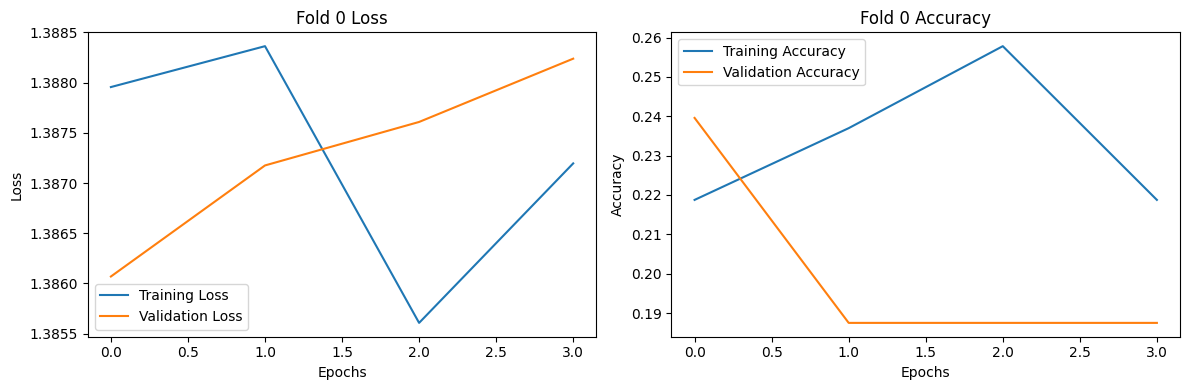

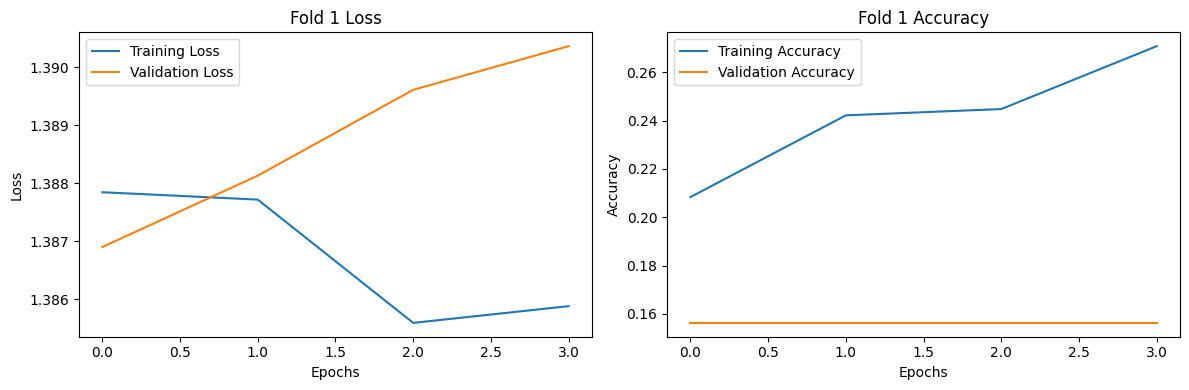

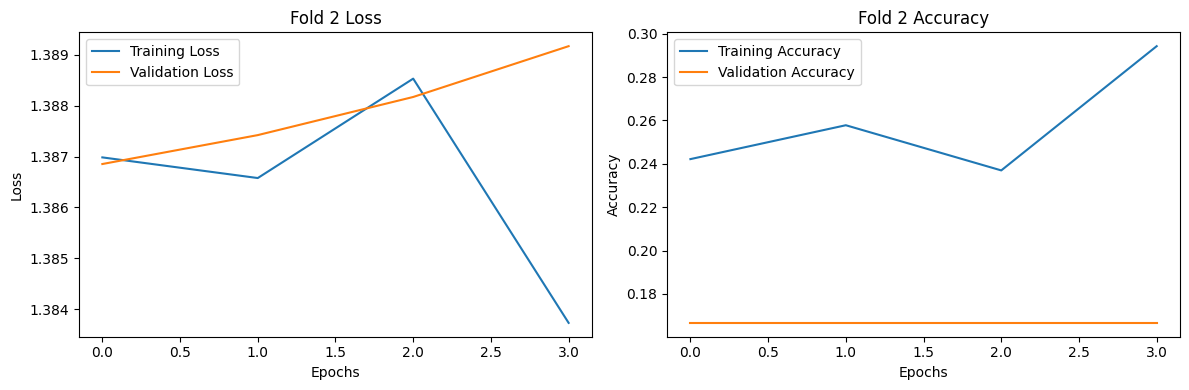

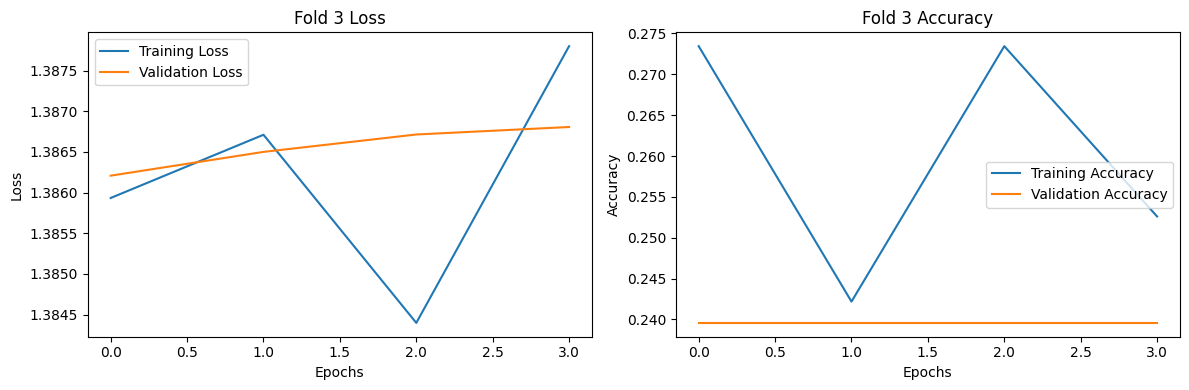

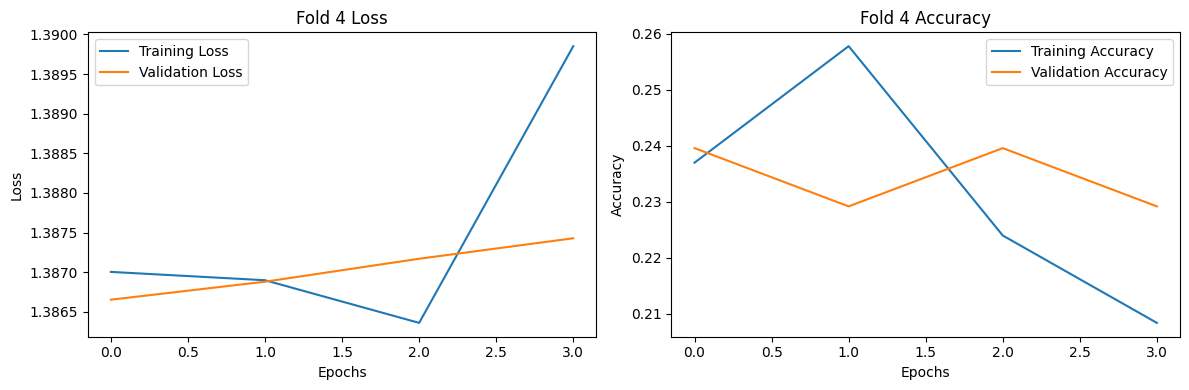

Accuracies for each fold:
Fold 0: 23.96%
Fold 1: 15.62%
Fold 2: 16.67%
Fold 3: 23.96%
Fold 4: 23.96%


In [518]:
base_dir = 'dataset_kfold'

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
fold_accuracies = []
models = []

for fold in range(5):
    print(f'Starting training for fold {fold}...')

    fold_dir = os.path.join(base_dir, f'fold_{fold}')
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')

    # Load the datasets
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    # Get the model and compile it
    num_classes = len(train_generator.class_indices)
    model = get_mobilenetv2_model(num_classes)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and evaluate the model
    model, history = train_model(model, train_generator, val_generator, num_epochs=10, patience=3)
    models.append(model)  # Save the model in the list for further evaluation

    # Collecting results for plotting
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

    print(f'Evaluating model for fold {fold}...')
    val_loss, val_acc = evaluate_model(model, val_generator)
    fold_accuracies.append(val_acc)
    print(f'Val loss: {val_loss:.4f}, Val accuracy: {val_acc * 100:.4f}')
    print(f'Training and evaluation for fold {fold} completed.\n')

# Detailed Evaluation for Each Fold
for fold in range(5):
    model = models[fold]  # Load the model from the list

    val_dir = os.path.join(base_dir, f'fold_{fold}', 'val')
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False
    )

    val_predictions = model.predict(val_generator)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = val_generator.classes

    val_conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)

    val_true_classes_one_hot = tf.keras.utils.to_categorical(val_true_classes, num_classes)
    auc_roc_scores = {}
    for i, class_name in enumerate(val_generator.class_indices.keys()):
        fpr, tpr, _ = roc_curve(val_true_classes_one_hot[:, i], val_predictions[:, i])
        roc_auc = auc(fpr, tpr)
        auc_roc_scores[class_name] = roc_auc
        print(f'Fold {fold} - ROC-AUC for class {class_name}: {roc_auc:.4f}')

    plt.figure(figsize=(8, 6))
    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Fold {fold} Validation Confusion Matrix')
    plt.show()

    print(f'Classification Report for Fold {fold}:')
    print(classification_report(val_true_classes, val_predictions_classes, target_names=list(val_generator.class_indices.keys())))

    class_names = list(val_generator.class_indices.keys())
    table_data = []
    for i, class_name in enumerate(class_names):
        tp = val_conf_matrix[i, i]
        fp = np.sum(val_conf_matrix[:, i]) - tp
        fn = np.sum(val_conf_matrix[i, :]) - tp
        tn = np.sum(val_conf_matrix) - tp - fp - fn
        table_data.append([class_name, tp, tn, fp, fn])

    print(f"Class-wise TP, TN, FP, FN for Fold {fold}:")
    for row in table_data:
        print(f"Class: {row[0]}, TP: {row[1]}, TN: {row[2]}, FP: {row[3]}, FN: {row[4]}")

# Plotting Results
def plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies):
    for fold in range(5):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(all_train_losses[fold], label='Training Loss')
        plt.plot(all_val_losses[fold], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Fold {fold} Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(all_train_accuracies[fold], label='Training Accuracy')
        plt.plot(all_val_accuracies[fold], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Fold {fold} Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)

print("Accuracies for each fold:")
for fold, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold}: {accuracy * 100:.2f}%")

# 3. Transfer Learning with Own Parameters

## Imports and Setup

In [507]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Load Mean and Standard Deviation Values

In [508]:
# Load mean and std values from JSON
with open('mean_std.json', 'r') as f:
    mean_std = json.load(f)
mean = np.array(mean_std['mean'])
std = np.array(mean_std['std'])

## Model Definition

In [509]:
def get_mobilenetv2_model(num_classes):
    weights_path = 'mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
    base_model = MobileNetV2(weights=None, include_top=False, input_shape=(224, 224, 3))
    base_model.load_weights(weights_path)

    # Unfreeze the last few layers for fine-tuning
    #for layer in base_model.layers[-20:]:
    #    layer.trainable = True
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

## Data Generators

In [510]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True
)
train_datagen.mean = mean
train_datagen.std = std

val_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
val_datagen.mean = mean
val_datagen.std = std

## Training and Evaluation Functions 

In [511]:
def train_model(model, train_generator, val_generator, num_epochs=10, patience=3):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr]
    )
    return model, history

def evaluate_model(model, generator):
    results = model.evaluate(generator)
    return results

## Main Training and Evaluation Loop

Starting training for fold 0...
Found 384 images belonging to 4 classes.


Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 131ms/step - loss: 1.9463 - accuracy: 0.3698 - val_loss: 1.0294 - val_accuracy: 0.5417 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 127ms/step - loss: 1.3370 - accuracy: 0.5729 - val_loss: 0.7791 - val_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 109ms/step - loss: 1.0042 - accuracy: 0.6458 - val_loss: 0.6287 - val_accuracy: 0.8021 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 109ms/step - loss: 0.8929 - accuracy: 0.6953 - val_loss: 0.5573 - val_accuracy: 0.7917 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 3s 109ms/step - loss: 0.8196 - accuracy: 0.7057 - val_loss: 0.4978 - val_accuracy: 0.8229 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 3s 109ms/step - loss: 0.6139 - accuracy: 0.7786 - val_loss: 0.4568 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 7/10
24/24 [============================

Epoch 1/10
24/24 [==============================] - 4s 131ms/step - loss: 1.9473 - accuracy: 0.3620 - val_loss: 1.1195 - val_accuracy: 0.4792 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 108ms/step - loss: 1.1671 - accuracy: 0.5729 - val_loss: 0.9062 - val_accuracy: 0.6354 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 109ms/step - loss: 0.9708 - accuracy: 0.6771 - val_loss: 0.7760 - val_accuracy: 0.7083 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 109ms/step - loss: 0.7447 - accuracy: 0.7161 - val_loss: 0.7065 - val_accuracy: 0.7292 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 3s 113ms/step - loss: 0.6878 - accuracy: 0.7526 - val_loss: 0.6621 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 3s 110ms/step - loss: 0.6567 - accuracy: 0.7812 - val_loss: 0.6229 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 7/10
24/24 [============================

Epoch 1/10
24/24 [==============================] - 4s 129ms/step - loss: 1.9555 - accuracy: 0.3516 - val_loss: 1.0747 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 112ms/step - loss: 1.3801 - accuracy: 0.5573 - val_loss: 0.8981 - val_accuracy: 0.6354 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 109ms/step - loss: 0.9893 - accuracy: 0.6562 - val_loss: 0.7551 - val_accuracy: 0.7083 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 109ms/step - loss: 0.9579 - accuracy: 0.6667 - val_loss: 0.6614 - val_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 3s 110ms/step - loss: 0.7507 - accuracy: 0.7266 - val_loss: 0.6075 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 3s 112ms/step - loss: 0.7309 - accuracy: 0.7240 - val_loss: 0.5518 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 7/10
24/24 [============================

Epoch 1/10
24/24 [==============================] - 6s 185ms/step - loss: 2.0710 - accuracy: 0.3151 - val_loss: 1.1705 - val_accuracy: 0.6146 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 110ms/step - loss: 1.3614 - accuracy: 0.5026 - val_loss: 0.8566 - val_accuracy: 0.6979 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 109ms/step - loss: 1.0036 - accuracy: 0.6667 - val_loss: 0.7118 - val_accuracy: 0.7396 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 109ms/step - loss: 0.7954 - accuracy: 0.7318 - val_loss: 0.6241 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 3s 113ms/step - loss: 0.8041 - accuracy: 0.7161 - val_loss: 0.5662 - val_accuracy: 0.7708 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 3s 113ms/step - loss: 0.7404 - accuracy: 0.7630 - val_loss: 0.5273 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 7/10
24/24 [============================

Epoch 1/10
24/24 [==============================] - 5s 141ms/step - loss: 2.0474 - accuracy: 0.3464 - val_loss: 1.3100 - val_accuracy: 0.3125 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 3s 112ms/step - loss: 1.3836 - accuracy: 0.5391 - val_loss: 0.9052 - val_accuracy: 0.5521 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 3s 114ms/step - loss: 0.9932 - accuracy: 0.6276 - val_loss: 0.6761 - val_accuracy: 0.6875 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 3s 112ms/step - loss: 0.8498 - accuracy: 0.7188 - val_loss: 0.5654 - val_accuracy: 0.8229 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 3s 113ms/step - loss: 0.7424 - accuracy: 0.7318 - val_loss: 0.4859 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 3s 121ms/step - loss: 0.6407 - accuracy: 0.7760 - val_loss: 0.4404 - val_accuracy: 0.8542 - lr: 1.0000e-04
Epoch 7/10
24/24 [============================

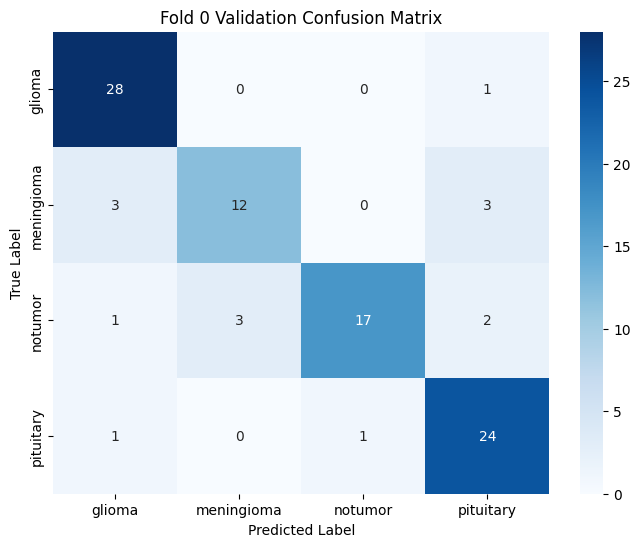

Classification Report for Fold 0:
              precision    recall  f1-score   support

      glioma       0.85      0.97      0.90        29
  meningioma       0.80      0.67      0.73        18
     notumor       0.94      0.74      0.83        23
   pituitary       0.80      0.92      0.86        26

    accuracy                           0.84        96
   macro avg       0.85      0.82      0.83        96
weighted avg       0.85      0.84      0.84        96

Class-wise TP, TN, FP, FN for Fold 0:
Class: glioma, TP: 28, TN: 62, FP: 5, FN: 1
Class: meningioma, TP: 12, TN: 75, FP: 3, FN: 6
Class: notumor, TP: 17, TN: 72, FP: 1, FN: 6
Class: pituitary, TP: 24, TN: 64, FP: 6, FN: 2
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 90ms/step
Fold 1 - ROC-AUC for class glioma: 0.9652
Fold 1 - ROC-AUC for class meningioma: 0.8687
Fold 1 - ROC-AUC for class notumor: 0.9794
Fold 1 - ROC-AUC for class pituitary: 0.9588


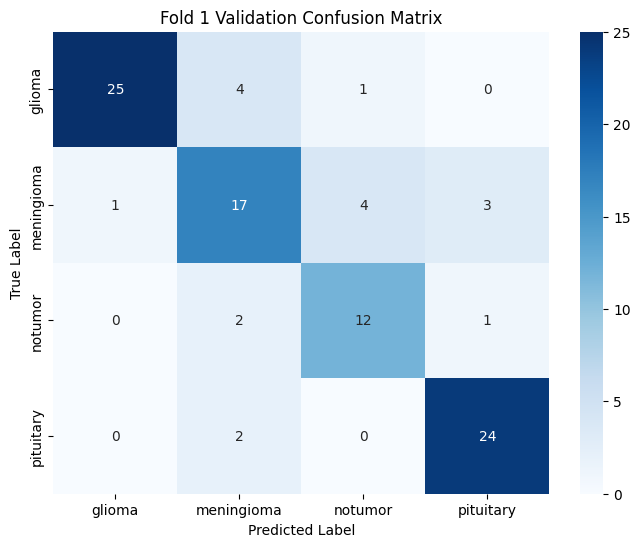

Classification Report for Fold 1:
              precision    recall  f1-score   support

      glioma       0.96      0.83      0.89        30
  meningioma       0.68      0.68      0.68        25
     notumor       0.71      0.80      0.75        15
   pituitary       0.86      0.92      0.89        26

    accuracy                           0.81        96
   macro avg       0.80      0.81      0.80        96
weighted avg       0.82      0.81      0.81        96

Class-wise TP, TN, FP, FN for Fold 1:
Class: glioma, TP: 25, TN: 65, FP: 1, FN: 5
Class: meningioma, TP: 17, TN: 63, FP: 8, FN: 8
Class: notumor, TP: 12, TN: 76, FP: 5, FN: 3
Class: pituitary, TP: 24, TN: 66, FP: 4, FN: 2
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 87ms/step
Fold 2 - ROC-AUC for class glioma: 0.9805
Fold 2 - ROC-AUC for class meningioma: 0.9198
Fold 2 - ROC-AUC for class notumor: 0.9758
Fold 2 - ROC-AUC for class pituitary: 0.9786


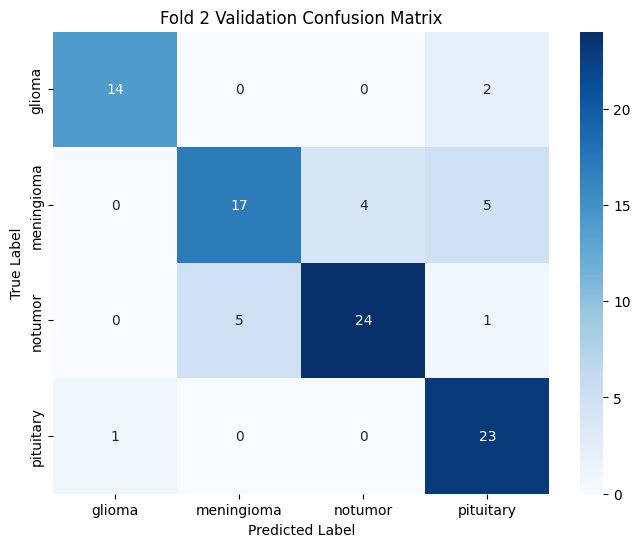

Classification Report for Fold 2:
              precision    recall  f1-score   support

      glioma       0.93      0.88      0.90        16
  meningioma       0.77      0.65      0.71        26
     notumor       0.86      0.80      0.83        30
   pituitary       0.74      0.96      0.84        24

    accuracy                           0.81        96
   macro avg       0.83      0.82      0.82        96
weighted avg       0.82      0.81      0.81        96

Class-wise TP, TN, FP, FN for Fold 2:
Class: glioma, TP: 14, TN: 79, FP: 1, FN: 2
Class: meningioma, TP: 17, TN: 65, FP: 5, FN: 9
Class: notumor, TP: 24, TN: 62, FP: 4, FN: 6
Class: pituitary, TP: 23, TN: 64, FP: 8, FN: 1
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 87ms/step
Fold 3 - ROC-AUC for class glioma: 0.9607
Fold 3 - ROC-AUC for class meningioma: 0.9265
Fold 3 - ROC-AUC for class notumor: 0.9656
Fold 3 - ROC-AUC for class pituitary: 0.9958


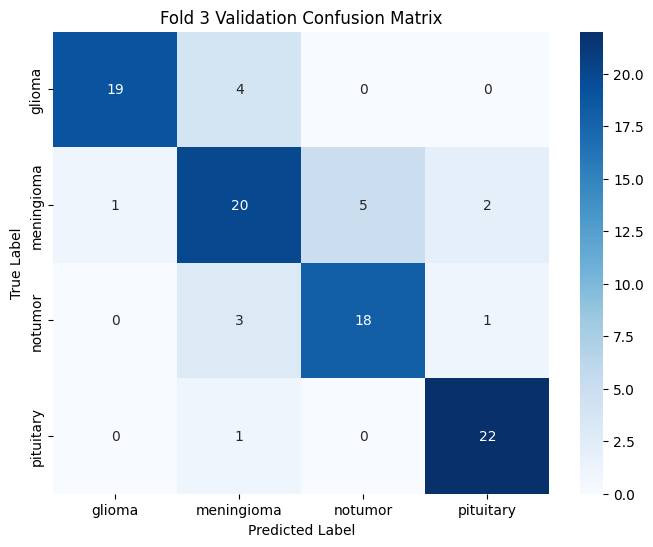

Classification Report for Fold 3:
              precision    recall  f1-score   support

      glioma       0.95      0.83      0.88        23
  meningioma       0.71      0.71      0.71        28
     notumor       0.78      0.82      0.80        22
   pituitary       0.88      0.96      0.92        23

    accuracy                           0.82        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.83      0.82      0.82        96

Class-wise TP, TN, FP, FN for Fold 3:
Class: glioma, TP: 19, TN: 72, FP: 1, FN: 4
Class: meningioma, TP: 20, TN: 60, FP: 8, FN: 8
Class: notumor, TP: 18, TN: 69, FP: 5, FN: 4
Class: pituitary, TP: 22, TN: 70, FP: 3, FN: 1
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 142ms/step
Fold 4 - ROC-AUC for class glioma: 0.9822
Fold 4 - ROC-AUC for class meningioma: 0.9214
Fold 4 - ROC-AUC for class notumor: 0.9823
Fold 4 - ROC-AUC for class pituitary: 0.9981


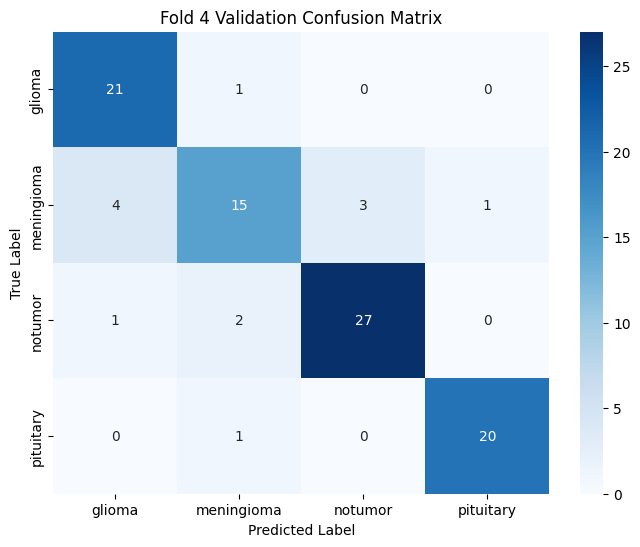

Classification Report for Fold 4:
              precision    recall  f1-score   support

      glioma       0.81      0.95      0.88        22
  meningioma       0.79      0.65      0.71        23
     notumor       0.90      0.90      0.90        30
   pituitary       0.95      0.95      0.95        21

    accuracy                           0.86        96
   macro avg       0.86      0.86      0.86        96
weighted avg       0.86      0.86      0.86        96

Class-wise TP, TN, FP, FN for Fold 4:
Class: glioma, TP: 21, TN: 69, FP: 5, FN: 1
Class: meningioma, TP: 15, TN: 69, FP: 4, FN: 8
Class: notumor, TP: 27, TN: 63, FP: 3, FN: 3
Class: pituitary, TP: 20, TN: 74, FP: 1, FN: 1


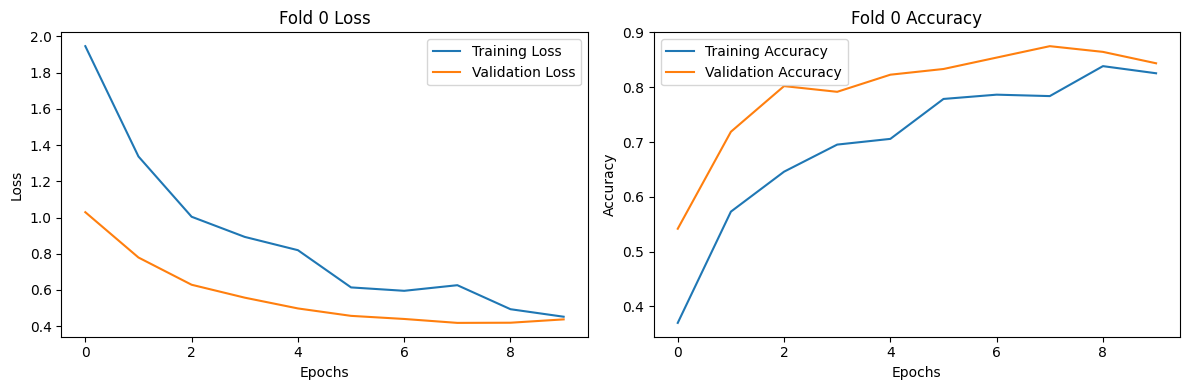

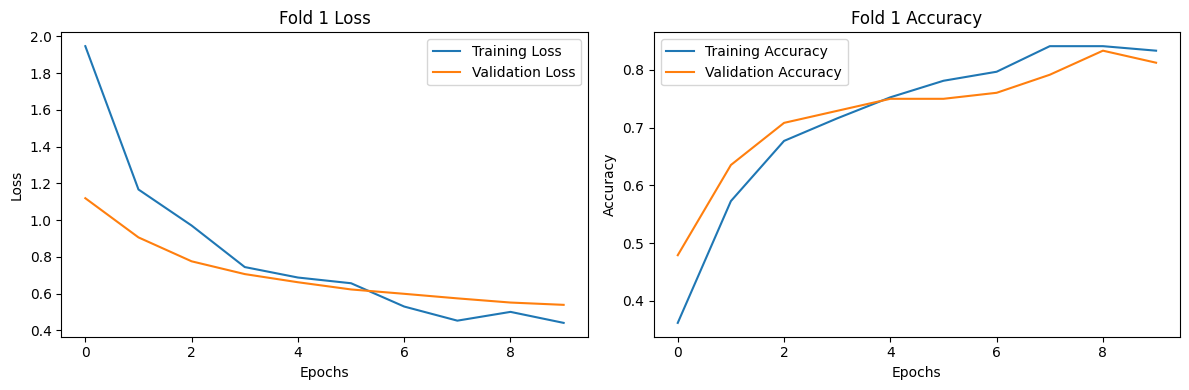

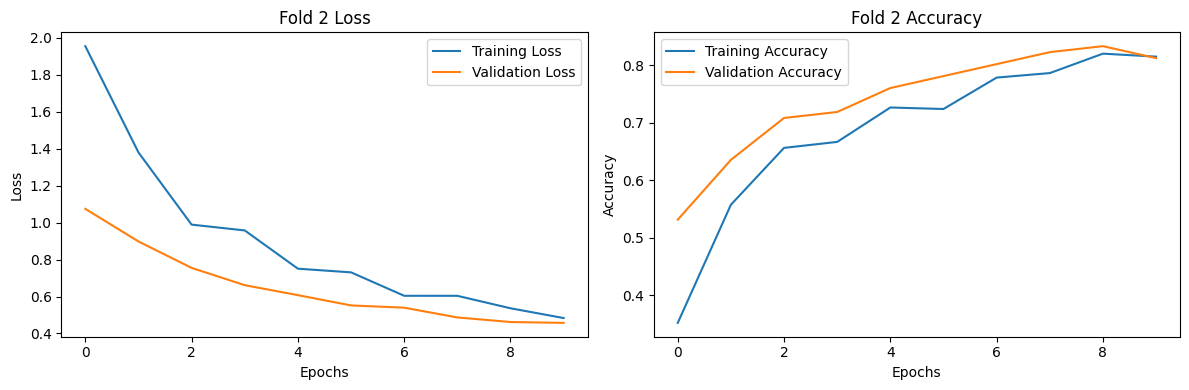

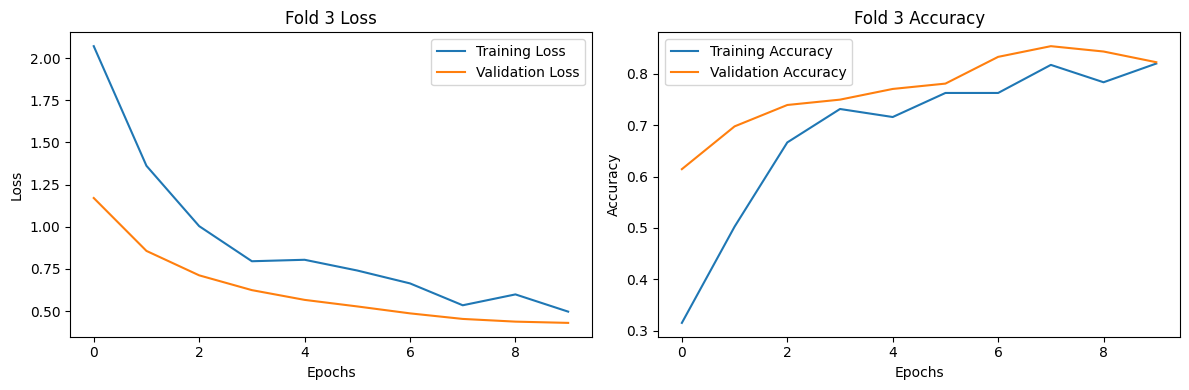

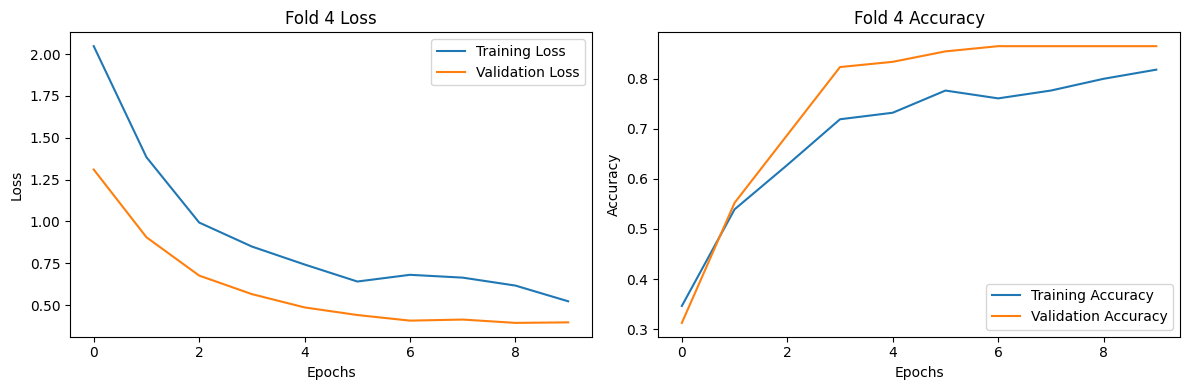

Accuracies for each fold:
Fold 0: 84.38%
Fold 1: 81.25%
Fold 2: 81.25%
Fold 3: 82.29%
Fold 4: 86.46%


In [512]:
base_dir = 'dataset_kfold'

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
fold_accuracies = []
models = []

for fold in range(5):
    print(f'Starting training for fold {fold}...')

    fold_dir = os.path.join(base_dir, f'fold_{fold}')
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')

    # Load the datasets
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    # Get the model and compile it
    num_classes = len(train_generator.class_indices)
    model = get_mobilenetv2_model(num_classes)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and evaluate the model
    model, history = train_model(model, train_generator, val_generator, num_epochs=10, patience=3)
    models.append(model)  # Save the model in the list for further evaluation

    # Collecting results for plotting
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

    print(f'Evaluating model for fold {fold}...')
    val_loss, val_acc = evaluate_model(model, val_generator)
    fold_accuracies.append(val_acc)
    print(f'Val loss: {val_loss:.4f}, Val accuracy: {val_acc * 100:.4f}')
    print(f'Training and evaluation for fold {fold} completed.\n')

# Detailed Evaluation for Each Fold
for fold in range(5):
    model = models[fold]  # Load the model from the list

    val_dir = os.path.join(base_dir, f'fold_{fold}', 'val')
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False
    )

    val_predictions = model.predict(val_generator)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = val_generator.classes

    val_conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)

    val_true_classes_one_hot = tf.keras.utils.to_categorical(val_true_classes, num_classes)
    auc_roc_scores = {}
    for i, class_name in enumerate(val_generator.class_indices.keys()):
        fpr, tpr, _ = roc_curve(val_true_classes_one_hot[:, i], val_predictions[:, i])
        roc_auc = auc(fpr, tpr)
        auc_roc_scores[class_name] = roc_auc
        print(f'Fold {fold} - ROC-AUC for class {class_name}: {roc_auc:.4f}')

    plt.figure(figsize=(8, 6))
    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Fold {fold} Validation Confusion Matrix')
    plt.show()

    print(f'Classification Report for Fold {fold}:')
    print(classification_report(val_true_classes, val_predictions_classes, target_names=list(val_generator.class_indices.keys())))

    class_names = list(val_generator.class_indices.keys())
    table_data = []
    for i, class_name in enumerate(class_names):
        tp = val_conf_matrix[i, i]
        fp = np.sum(val_conf_matrix[:, i]) - tp
        fn = np.sum(val_conf_matrix[i, :]) - tp
        tn = np.sum(val_conf_matrix) - tp - fp - fn
        table_data.append([class_name, tp, tn, fp, fn])

    print(f"Class-wise TP, TN, FP, FN for Fold {fold}:")
    for row in table_data:
        print(f"Class: {row[0]}, TP: {row[1]}, TN: {row[2]}, FP: {row[3]}, FN: {row[4]}")

# Plotting Results
def plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies):
    for fold in range(5):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(all_train_losses[fold], label='Training Loss')
        plt.plot(all_val_losses[fold], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Fold {fold} Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(all_train_accuracies[fold], label='Training Accuracy')
        plt.plot(all_val_accuracies[fold], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Fold {fold} Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)

print("Accuracies for each fold:")
for fold, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold}: {accuracy * 100:.2f}%")